## Madrid Property Analysis

We have already done the feature engineering in the section above, so here we will explore some data, and move on to the model

#### 1) Exploratory Data Analysis
- In this step we will discover and visualize the data deeper to gain insights and check for correlations. 

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_16958/1254213584.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('../data/split/stratified_train_set.csv')

In [3]:
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),annualized_return,socioeconomic_score,investment_score,investment_category
0,3.0,93.0,529000,-3.676820,40.456285,Hispanoamérica,NaN,5202,2.4,-0.7,...,13.725735,0.621697,32042,12461,45.940516,187.104041,-0.938660,0.489241,-0.510289,3
1,1.0,65.0,174000,-3.623735,40.382615,Casco Histórico de Vallecas,Villa de Vallecas,1861,-1.3,-6.6,...,25.380897,0.113811,40956,14957,41.370373,9.514498,-0.870566,-0.837298,-0.860586,0
2,14.0,203.0,1425000,-3.688501,40.453925,Hispanoamérica,Chamartín,5202,2.4,-0.7,...,13.725735,0.621697,32042,12461,45.940516,187.104041,-0.831523,0.489241,-0.435294,3
3,2.0,138.0,420700,-3.585459,40.470546,Timón,Barajas,2963,-0.7,-1.2,...,16.750953,0.389932,12853,4755,38.088034,25.229337,-0.886847,-0.238059,-0.692211,1
4,4.0,93.0,850000,-3.654132,40.456655,San Juan Bautista,Ciudad Lineal,4275,2.3,2.0,...,16.243615,0.598292,12725,4939,44.283418,125.884877,-0.869308,0.204710,-0.547102,2


In [4]:
df.shape

(14285, 29)

Our dataset is now smaller, as expected as we have made the split and are currently only exploring the training dataset. We have alot of columns we can potentially explore and we will start by exploring features that have potential for good investment. 

##### 1.1 Visualizing Target Variable Distribution

Since we created the target variable with features, we will now visualize the distribution it - 'investment_category'

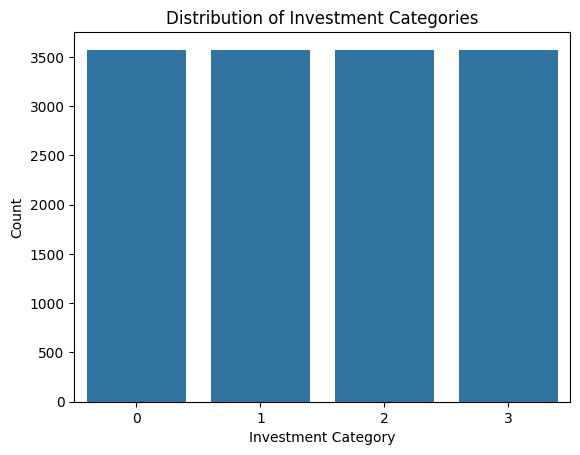

In [5]:
sns.countplot(x='investment_category', data=df)
plt.title('Distribution of Investment Categories')
plt.xlabel('Investment Category')
plt.ylabel('Count')
plt.show()

We can see that our investment_category data is evenly distributed. 

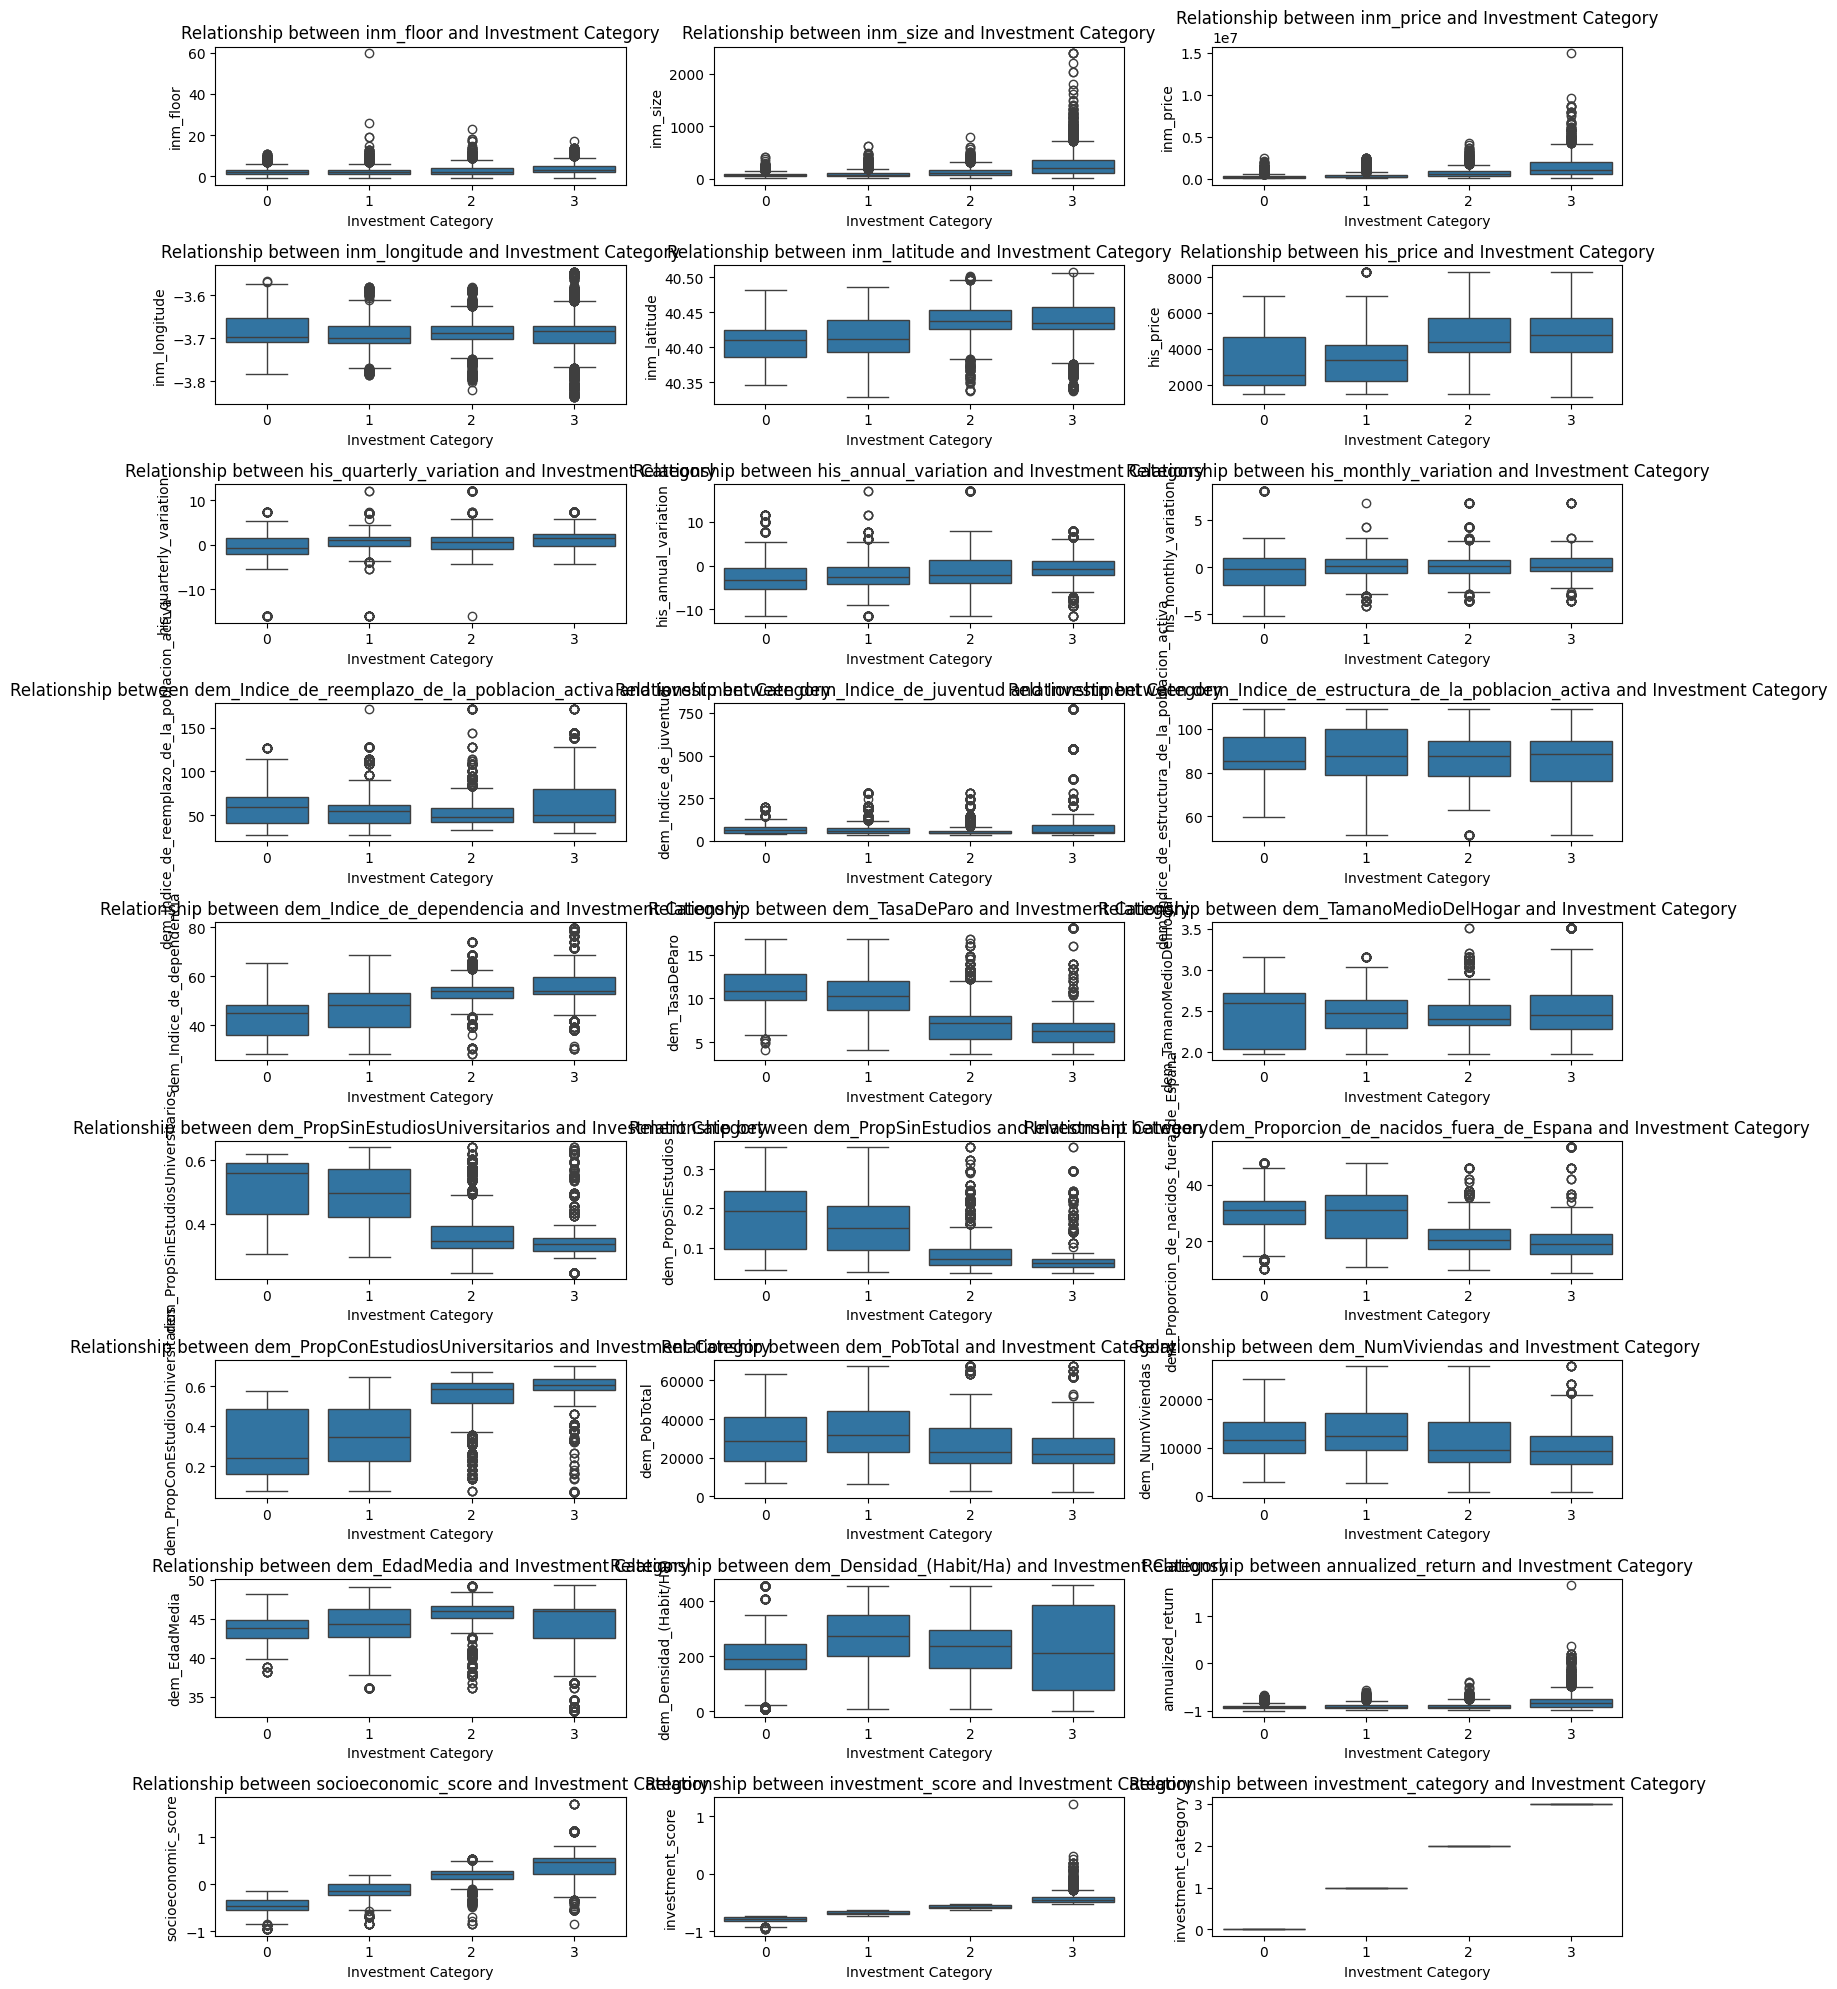

In [6]:
import math

# Visualize the relationships between all numeric features and the target variable
numeric_features = df.select_dtypes(include=np.number).columns.tolist()  # Get all numeric columns

# Calculate the number of rows and columns for the grid layout
num_features = len(numeric_features)
rows = math.ceil(num_features / 3)
cols = min(num_features, 3)

# Adjust the size of the plots
plt.figure(figsize=(15, 20))

# Loop through each numeric feature and create a boxplot
for i, feature in enumerate(numeric_features, start=1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='investment_category', y=feature, data=df)
    plt.title(f'Relationship between {feature} and Investment Category')
    plt.xlabel('Investment Category')
    plt.ylabel(feature)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The boxplots indicate that larger property sizes and higher historical prices are associated with higher investment categories, while the geographical location (longitude and latitude) shows little variation across categories. Outliers suggest variability in floor count and historical price trends.

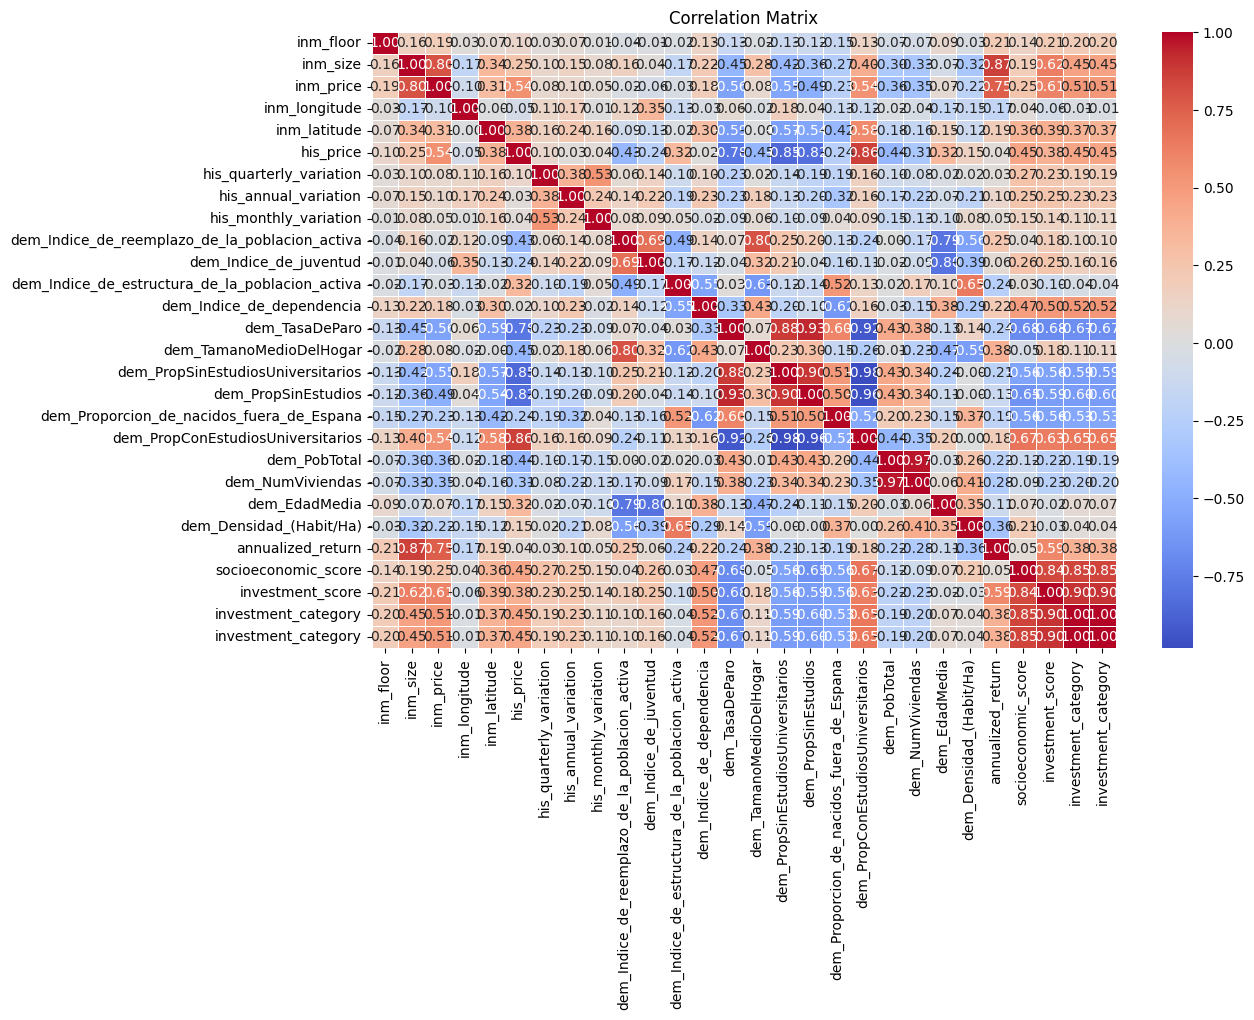

In [7]:
# Visualize the correlation matrix
correlation_matrix = df[numeric_features + ['investment_category']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Based on this, we can see variables that relate with our investment category, such as the ones we featured including the investment score, socioeconomic score, annualized return etc. 